In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
import pickle
import matplotlib
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load X and y featurs
X = np.load('X_feature.npy')
y_features = open('y_feature.pkl', 'rb')
y = pickle.load(y_features)
X.shape

(852, 3136)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7887323943661971

In [5]:
# model = SVC(kernel='rbf')
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [6]:
from sklearn.metrics import confusion_matrix
matrix_svm = confusion_matrix(y_test, model.predict(X_test))
matrix_svm

array([[23,  1,  0,  1,  0,  2],
       [ 0, 61,  2,  2,  0,  2],
       [ 0,  4, 22,  0,  3,  0],
       [ 1,  5,  0, 28,  0,  0],
       [ 2,  5,  2,  0, 20,  4],
       [ 1,  3,  1,  0,  4, 14]], dtype=int64)

Text(114.0, 0.5, 'Truth')

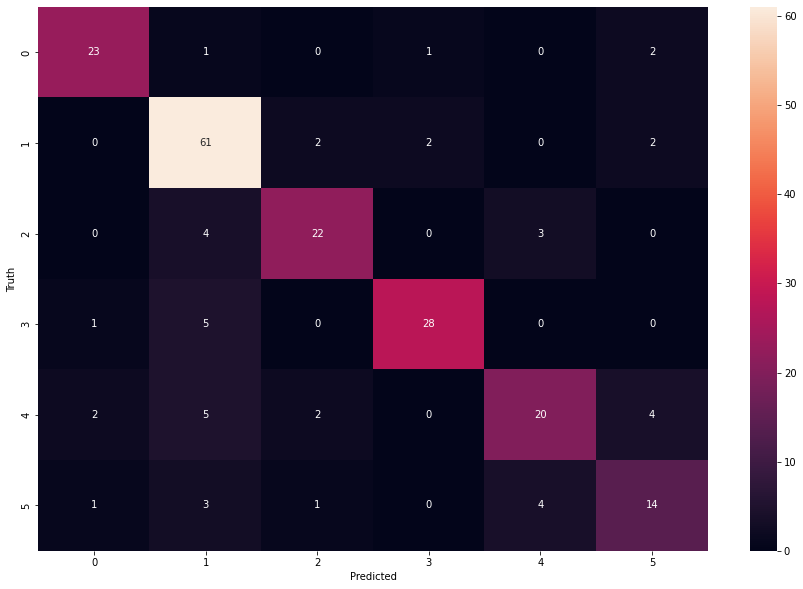

In [7]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(matrix_svm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
className ={ 0 : 'abdul_kalam',
 1 : 'maria',
 2 : 'messi',
 3 : 'modiji',
 4 : 'MsDhoni',
 5 : 'roger Federer'
}

In [9]:
'''
    function to get cropped image back 
'''
def getCroppedImage(image):
    face_cascade = cv2.CascadeClassifier('./opencv_harr/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv_harr/haarcascades/haarcascade_eye.xml')
    if image is not None:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces_arr = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces_arr:
            face_gray = gray[y : y+h, x: x+w]
            face_color = image[y : y+h, x: x+w]
            eyes_arr = eye_cascade.detectMultiScale(face_gray)
    #         if more than 2 eyes are there than only return
            if(len(eyes_arr) >= 2):
                return face_color

In [10]:
import pywt

def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [11]:
def classify(img):
    img = getCroppedImage(img)
    if img is None:
        print("Sorry Cannot recognize")
        return
#         plt.imshow(np.float32(img))
    else:
        plt.imshow(img)
        resize_img = cv2.resize(img, (28,28))
        waveLet = wavelet_transform(img, 'db1', 5)
        resized_wavelet = cv2.resize(waveLet, (28,28))
        merge = np.vstack((resize_img.reshape(28*28*3, 1), resized_wavelet.reshape(28*28, 1)))
        predict = merge.reshape(1, X.shape[1]).astype(float)
        val = model.predict(predict)[0]
        print(val)
        print(className[val])

        

0
abdul_kalam


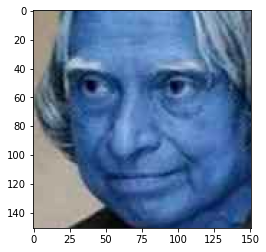

In [12]:
PATH = './test_images/kalam1.jpg'

im = cv2.imread(PATH)
if im is None:
    print("File is not supported try another")
else:
    plt.imshow(im)
    classify(im)